In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1),(1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7),(1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7),(1, 1, 1)]})
print(cmap)

In [3]:
plt.colormaps.register(cmap)

In [4]:
df = pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [6]:
df.describe().round(2)

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.00,104.00,102.00,104.00,104.00,104.00,104.00,103.00,104.00,104.00,104.00,104.00
mean,52.50,3.62,3.83,92.60,56.88,87.09,37.01,68.46,48.13,15.05,27.00,32.59
std,30.17,2.35,1.91,3.57,3.11,4.31,1.96,4.40,4.11,1.05,2.05,2.76
min,1.00,1.00,1.00,82.50,50.00,75.00,32.00,60.30,40.30,12.80,22.00,25.00
25%,26.75,1.00,2.25,90.68,54.98,84.00,35.88,64.60,44.80,14.40,25.50,31.00
50%,52.50,3.00,3.00,92.80,56.35,88.00,37.00,68.00,46.80,14.90,27.00,32.50
75%,78.25,6.00,5.00,94.72,58.10,90.00,38.00,72.50,52.00,15.72,28.00,34.12
max,104.00,7.00,9.00,103.10,68.60,96.50,43.00,77.90,56.20,17.80,32.00,40.00


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Pop'].value_counts(normalize=True)

Pop
other    0.557692
Vic      0.442308
Name: proportion, dtype: float64

In [9]:
from phik.report import plot_correlation_matrix

interval columns not set, guessing: ['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']


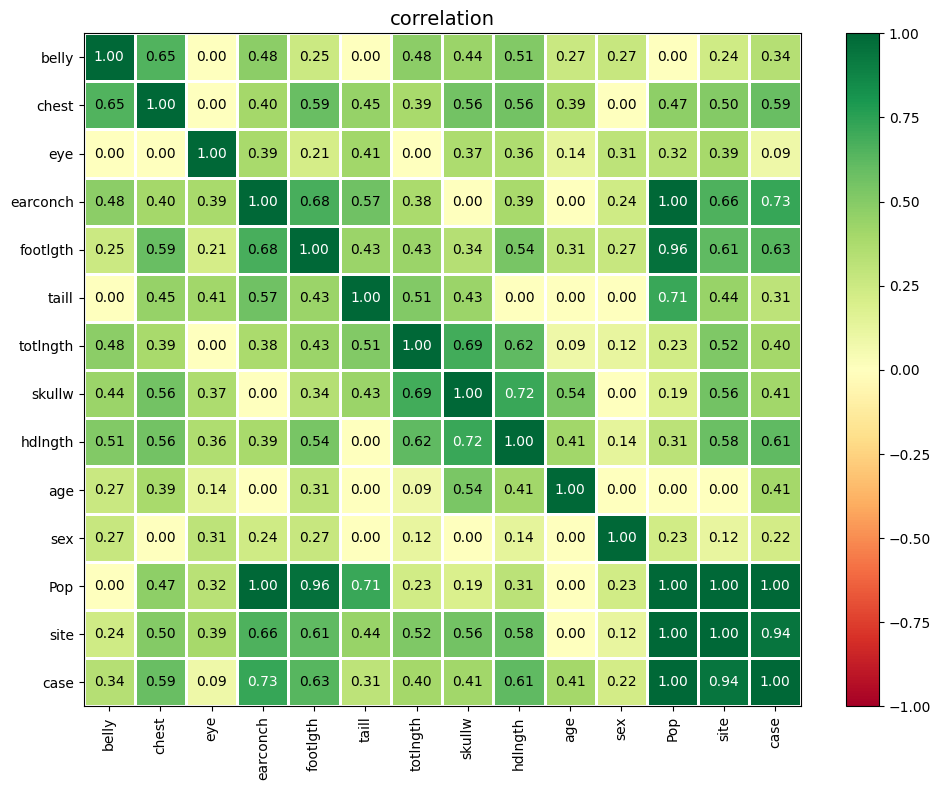

In [10]:
# visualizing the correlation matrix
phik_matrix = df.phik_matrix()
plot_correlation_matrix(phik_matrix.values, x_labels=phik_matrix.columns, y_labels=phik_matrix.index, figsize=(10, 8))

In [11]:
#To forecast the model, we will remove from the analysis capitals with zero correlation 'age' and with correlation approaching one 'site', 'case'.
#I think we will keep the "belly girth" parameter, although it also has zero correlation.

In [12]:
df_filtered = df.drop(['site', 'case', 'age', 'footlgth'], axis = 1)

In [13]:
df_filtered.groupby('Pop').agg('mean').round(2)

TypeError: agg function failed [how->mean,dtype->object]

In [14]:
categorical_list = [col for col in df_filtered.drop(['Pop'], axis=1).columns if df_filtered[col].nunique() <= 10]
non_categorical_list = [col for col in df_filtered.drop(['Pop'], axis=1).columns if df_filtered[col].nunique() > 10]

print(categorical_list)
print(non_categorical_list)

['sex']
['hdlngth', 'skullw', 'totlngth', 'taill', 'earconch', 'eye', 'chest', 'belly']


In [15]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

Number of axes created: 9


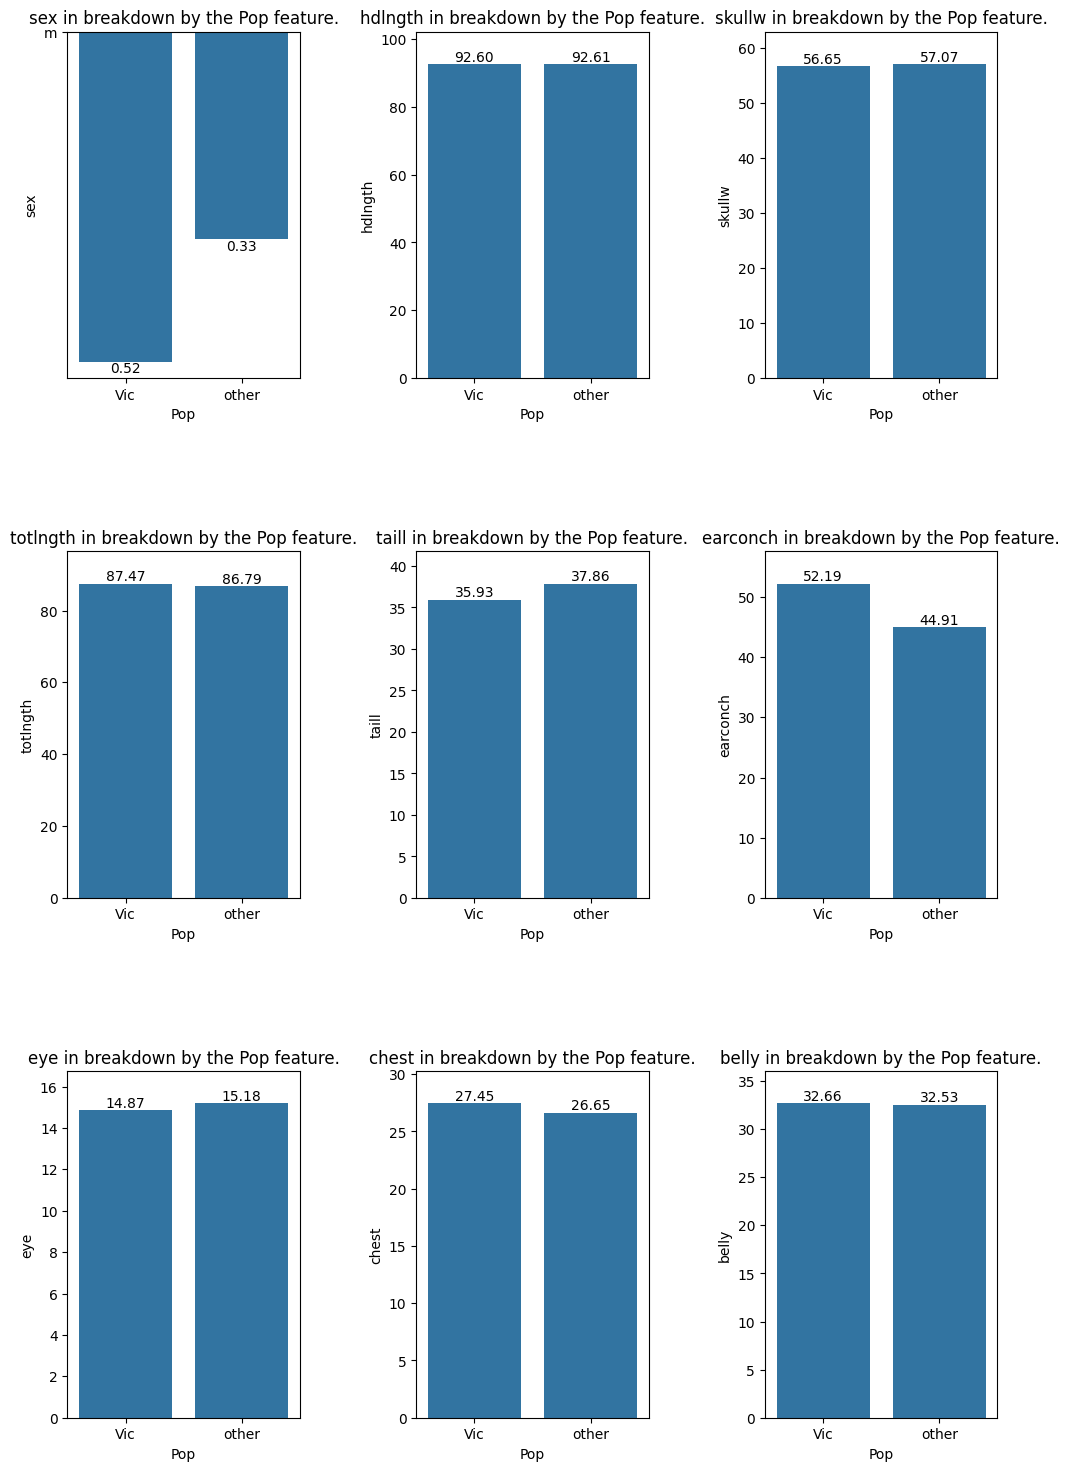

In [16]:
num_plots = len(categorical_list) + len(non_categorical_list)  # Общее количество графиков
rows = math.ceil(num_plots / 3)  # Количество строк
cols = min(num_plots, 3)  # Количество столбцов (не более 3)

# Determine the number of rows and columns in the grid.
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*4, rows*6))

if isinstance(axes, plt.Axes):
    axes = [axes]
else:
    axes = axes.flatten() 
    
print(f"Number of axes created: {len(axes)}")

for i, col in enumerate(categorical_list):
    ax = sns.barplot(data=df_filtered, x='Pop', y=col, ax=axes[i], errorbar=None)
    ax.set_title(f'{col} in breakdown by the Pop feature.')
    bar_labels = [f"{value:.2f}" for value in ax.containers[0].datavalues]
    ax.bar_label(ax.containers[0], labels=bar_labels)
    
    # Setting the y-axis limits of the plot.
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], ylim[1] * 1.05) 

for j, col in enumerate(non_categorical_list, start=len(categorical_list)):
    ax = sns.barplot(data=df_filtered, x='Pop', y=col, ax=axes[j], errorbar=None)
    ax.set_title(f'{col} in breakdown by the Pop feature.')
    bar_labels = [f"{value:.2f}" for value in ax.containers[0].datavalues]
    ax.bar_label(ax.containers[0], labels=bar_labels)
    
    # Setting the y-axis limits of the plot.
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], ylim[1] * 1.05)  

# Remove unnecessary empty axes.
for k in range(num_plots, len(axes)):
    axes[k].axis('off')  # Скрываем пустые оси

# Adjust the spacing between the plots.
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

Number of axes created: 9


/var/folders/_6/12fzbvp94678_q2_87lb1bwr0000gn/T/ipykernel_16222/1126048696.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_filtered, x='Pop', y=col, ax=axes[i], palette='Set2')
/var/folders/_6/12fzbvp94678_q2_87lb1bwr0000gn/T/ipykernel_16222/1126048696.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_filtered, x='Pop', y=col, ax=axes[i], palette='Set2')
/var/folders/_6/12fzbvp94678_q2_87lb1bwr0000gn/T/ipykernel_16222/1126048696.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_filtered, x='

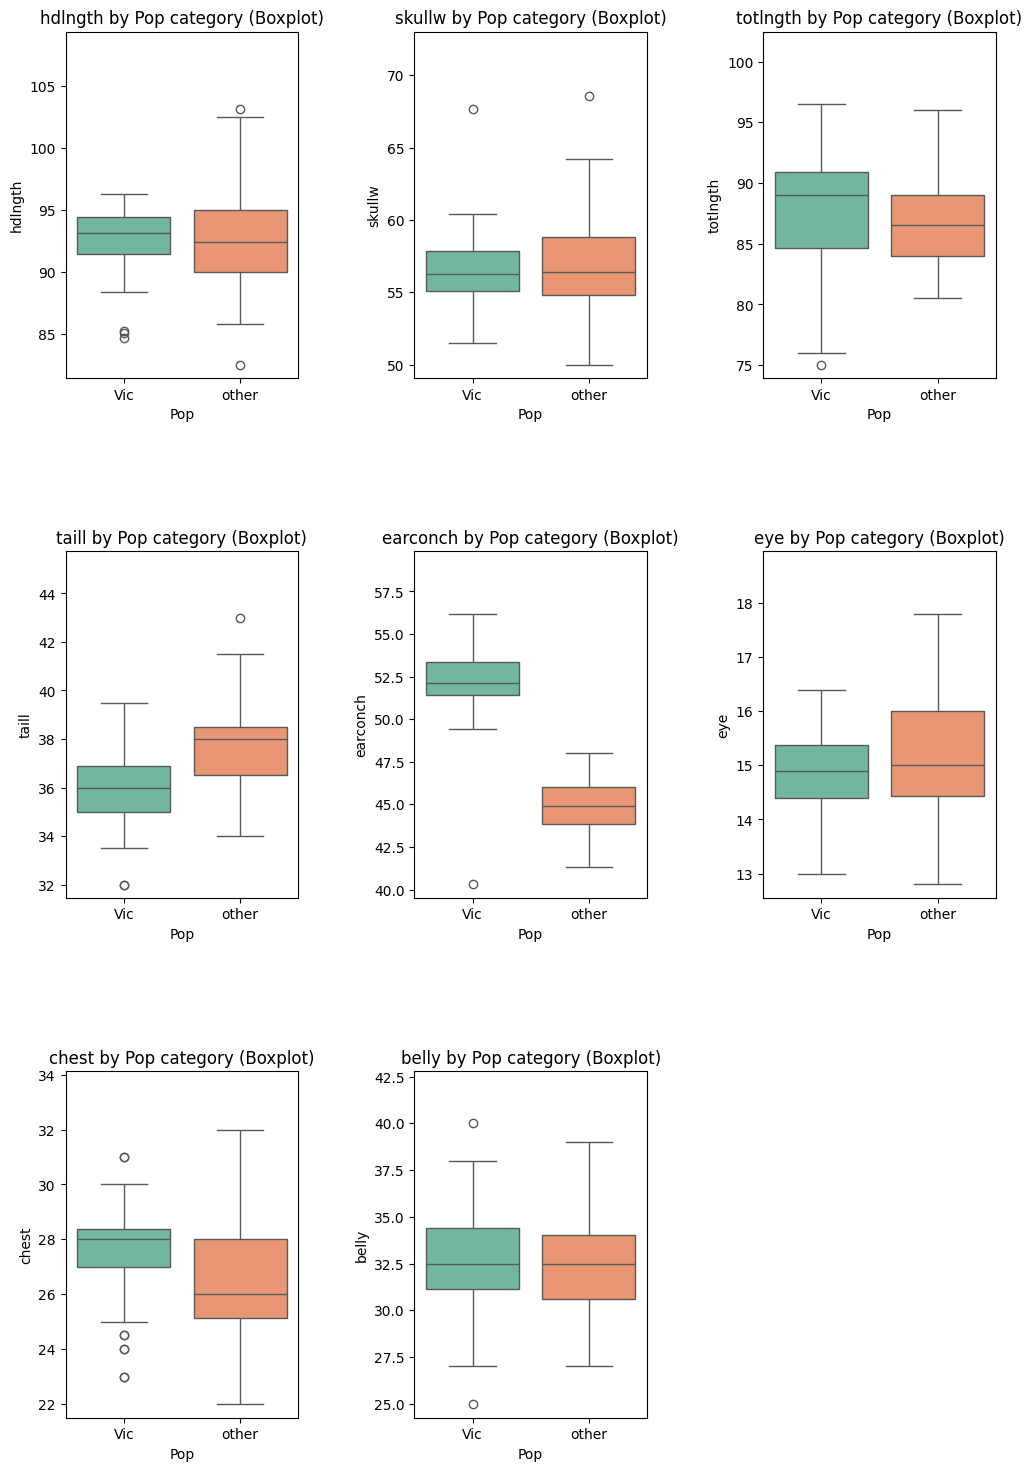

In [17]:
num_plots = len(non_categorical_list) 
rows = math.ceil(num_plots / 3)  
cols = min(num_plots, 3)  

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*4, rows*6))


if isinstance(axes, plt.Axes):
    axes = [axes]  
else:
    axes = axes.flatten()  

print(f"Number of axes created: {len(axes)}")

for i, col in enumerate(non_categorical_list):
    ax = sns.boxplot(data=df_filtered, x='Pop', y=col, ax=axes[i], palette='Set2')
    ax.set_title(f'{col} by Pop category (Boxplot)')
    
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], ylim[1] * 1.05)  


for j in range(num_plots, len(axes)):
    axes[j].axis('off')  

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

In [ ]:
# 'Vic' = 0
# 'Other' = 1

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [19]:
X = df_filtered.drop('Pop', axis=1)
y = df_filtered['Pop']

# Convert categorical columns to numerical using LabelEncoder.
label_encoder = LabelEncoder()

# Apply LabelEncoder to the target variable. ('Pop')
y = label_encoder.fit_transform(y)

# Apply LabelEncoder to the categorical column. ('sex')
X['sex'] = label_encoder.fit_transform(X['sex'])

# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)

# обучим модель лог.регрессии
lr_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test)

print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



Text(50.722222222222214, 0.5, 'Fact')

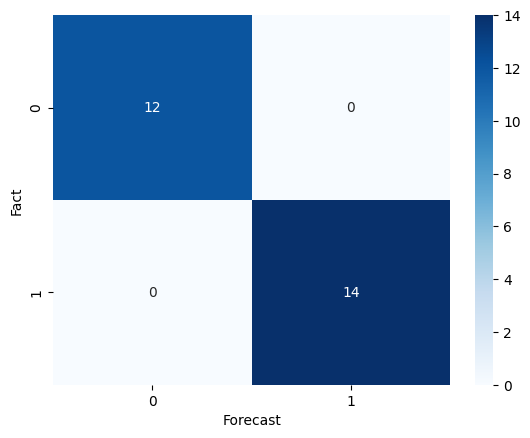

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Forecast')
plt.ylabel('Fact')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



Text(50.722222222222214, 0.5, 'Fact')

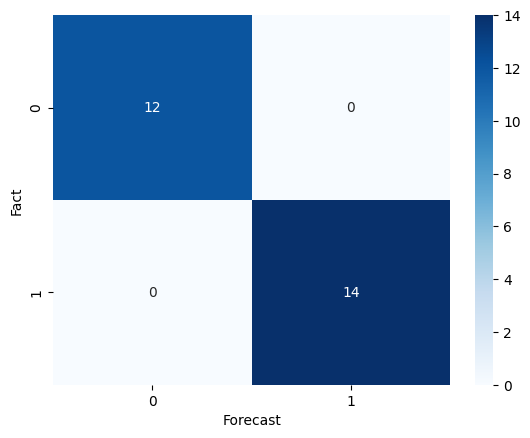

In [24]:
lr_model = LogisticRegression(random_state=42, class_weight='balanced')

lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

print(classification_report(y_test, lr_predictions))

cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Forecast')
plt.ylabel('Fact')